<a href="https://colab.research.google.com/github/CrabRave4204/KSU-IE/blob/main/SQCHW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

df = pd.read_csv('/content/Table13E.7.csv')

print(df)


    Order  Mixer Port  Temp  Time  Weight  Delay  Standard Deviation
0       1          -1    -1    -1      -1     -1                1.13
1       2           1    -1    -1      -1      1                1.25
2       3          -1     1    -1      -1      1                0.97
3       4           1     1    -1      -1     -1                1.70
4       5          -1    -1     1      -1      1                1.47
5       6           1    -1     1      -1     -1                1.28
6       7          -1     1     1      -1     -1                1.18
7       8           1     1     1      -1      1                0.98
8       9          -1    -1    -1       1      1                0.78
9      10           1    -1    -1       1     -1                1.36
10     11          -1     1    -1       1     -1                1.85
11     12           1     1    -1       1      1                0.62
12     13          -1    -1     1       1     -1                1.09
13     14           1    -1     1 

In [5]:

df = df.rename(columns={
    'Mixer Port': 'A',
    'Temp': 'B',
    'Time': 'C',
    'Weight': 'D',
    'Delay': 'E',
    'Standard Deviation' : 'Y'
})

print(df)

    Order  A  B  C  D  E     Y
0       1 -1 -1 -1 -1 -1  1.13
1       2  1 -1 -1 -1  1  1.25
2       3 -1  1 -1 -1  1  0.97
3       4  1  1 -1 -1 -1  1.70
4       5 -1 -1  1 -1  1  1.47
5       6  1 -1  1 -1 -1  1.28
6       7 -1  1  1 -1 -1  1.18
7       8  1  1  1 -1  1  0.98
8       9 -1 -1 -1  1  1  0.78
9      10  1 -1 -1  1 -1  1.36
10     11 -1  1 -1  1 -1  1.85
11     12  1  1 -1  1  1  0.62
12     13 -1 -1  1  1 -1  1.09
13     14  1 -1  1  1  1  1.10
14     15 -1  1  1  1  1  0.76
15     16  1  1  1  1 -1  2.10


In [11]:


import statsmodels.formula.api as sm


model = sm.ols('Y ~ A + B + C + D + E+ A:B:C:D:E', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     1.438
Date:                Mon, 21 Oct 2024   Prob (F-statistic):              0.292
Time:                        04:15:09   Log-Likelihood:                -3.2392
No. Observations:                  16   AIC:                             18.48
Df Residuals:                      10   BIC:                             23.11
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6131      0.047     13.089      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


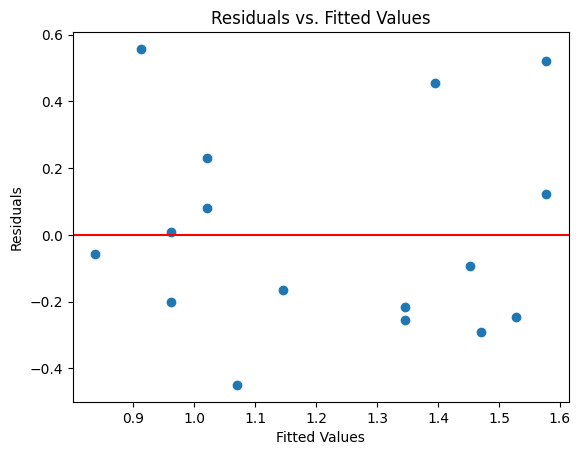

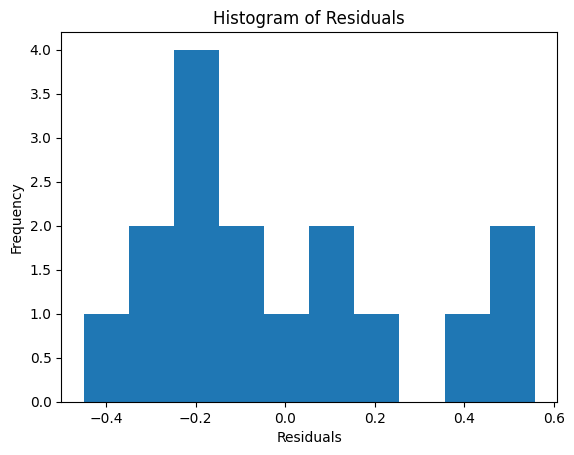

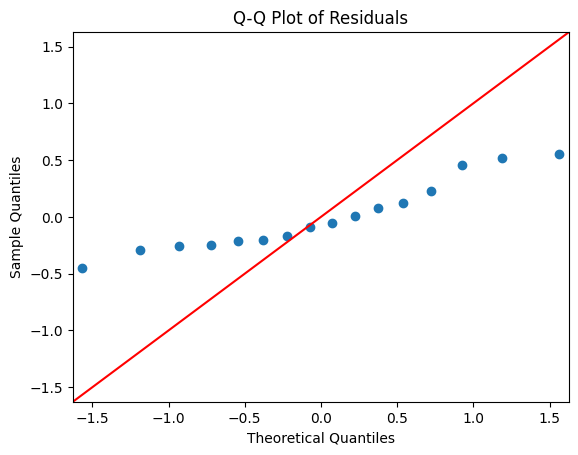

Durbin-Watson statistic: 2.138052727143264


In [8]:


import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

residuals = model.resid

plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

plt.hist(residuals)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

import statsmodels.api as sm
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic}")
